## What is Feature Extraction?

**Feature Extraction** is the process of transforming **raw data** (such as text, images, or audio) into **numerical features** that can be used by machine learning algorithms.  
Since ML models cannot directly understand raw text, we must convert text into structured representations (numbers, vectors, or embeddings).

### Why Feature Extraction for Text?
- Text is **unstructured** → words, sentences, paragraphs.  
- ML models require **numerical input**.  
- Extraction captures **important patterns** in text (e.g., word frequency, meaning, sentiment).  

### Steps in Feature Extraction

#### 1. Text Preprocessing (Before Feature Extraction)

Preprocessing makes text cleaner and consistent. Steps include:

**Lowercasing**:

"I LOVE AI" → "i love ai"

**Removing punctuation & special characters**:

"Data, Science!!!" → "data science"

**Tokenization**:

- The process of splitting text into smaller units called *tokens* (words, subwords, or characters).  
- "Machine learning is fun" → ["machine", "learning", "is", "fun"]

**Stopword removal (common but not useful words)**:
- Stopwords are common words (like "the", "is", "at", "and") that usually don’t add much meaning. 
- Removing them reduces noise in the text.  
- Example: "I am learning data science" → "learning data science"

**Stemming / Lemmatization (reducing to base form)**:
- Both methods reduce words to their base form, helping models treat variations of a word as the same feature. 

**Stemming**
- Stemming is a **rule-based process** that chops off prefixes or suffixes to get to the root form of a word.  
- It doesn’t always produce valid words in the language.
- **Algorithm examples:** Porter Stemmer, Snowball Stemmer, Lancaster Stemmer.
- **Pros:** Fast and simple.  
- **Cons:** Can produce stems that are not actual words.
- **Examples**:
- "playing" → "play"
- "studies" → "studi"
- "running" → "run" 

**Lemmatization**
- Lemmatization uses **vocabulary analysis** to reduce words to their **dictionary form (lemma)**.  
- It considers the **context** and part of speech (POS) of a word.
- **Algorithm examples:** WordNet Lemmatizer (NLTK), spaCy lemmatizer.  
- **Pros:** Produces valid words; more accurate.  
- **Cons:** Slower than stemming because it uses dictionaries and grammar rules.
- **Examples:**
- "better" → "good" (adjective lemma)
- "studies" → "study" (noun/verb lemma)
- "running" → "run" (verb lemma)

### Types of Feature Extraction in Text

Feature extraction transforms raw text into numerical features for machine learning.  
There are **two major categories**:  

### 1. Frequency-Based Methods (Classical)
These methods rely on **word frequency statistics**.

#### a) Bag of Words (BoW)
- Represents text as a vector of **word counts**.  
- Ignores grammar and word order.  
- Implemented in scikit-learn using `CountVectorizer`.  

**Example:**  
For example, consider the following set of three phrases:

In [2]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7 stored elements and shape (3, 5)>

The result is a sparse matrix recording the number of times each word appears; it is easier to inspect if we convert this to a DataFrame with labeled columns:

In [4]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


`Issue`: the raw word counts lead to features which put too much weight on words that appear very frequently

One approach to fix this is known as `term frequency-inverse document frequency (TF–IDF)` which weights the word counts by a measure of how often they appear in the documents.

- pros- Simple, interpretable  
- cons: High dimensional, ignores context  

#### b) TF–IDF (Term Frequency – Inverse Document Frequency)
- Extends BoW by weighing **important words higher**.  
- Common words like "the", "is" get **low weight**.  
- Rare but informative words get **high weight**.  

- pros: Reduces noise from frequent words  
- Still: ignores word order and context  

In [6]:
# TF-IDF with stopword removal and min_df to filter rare words
vec = TfidfVectorizer(
    stop_words='english',   # remove common English stopwords like 'of'
    min_df=1                # keep words that appear in at least 1 document
)

# Fit and transform
X = vec.fit_transform(sample)

# Convert to DataFrame with correct feature names
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
print(df)

       evil   horizon   problem     queen
0  0.707107  0.000000  0.707107  0.000000
1  0.605349  0.000000  0.000000  0.795961
2  0.000000  0.795961  0.605349  0.000000


#### c) N-Grams
- Captures **sequences of words** (unigrams, bigrams, trigrams).  

**Example:**  
Sentence: "machine learning is fun"  
- Unigrams: [machine, learning, is, fun]  
- Bigrams: [machine learning, learning is, is fun]  

- pros: Preserves some context  
- cons: Feature space grows quickly  

#### d) Statistical / Structural Features
- Extracts **numeric attributes** about text:  
  - Document length (#words, #sentences)  
  - Average word length  
  - Vocabulary richness  
  - Special characters ("!!!", "#", capital letters)  

- Useful in tasks like spam detection, author profiling  

#### e) Sentiment Features
- Captures **emotional tone** using polarity & subjectivity.  

**Example:**  
- "I love this phone" → Positive (+0.9)  
- "This is terrible" → Negative (-0.8)  

- pros: Adds meaning beyond raw words  
- cons: Requires external sentiment models  

### 2. Embedding-Based Methods (Modern, Semantic)
These methods represent words/sentences as **dense vectors**(compact numerical representations) that capture meaning.

#### a) Word Embeddings (Static)
- Each word has a **fixed vector**, regardless of context.  
- Examples: **Word2Vec, GloVe, FastText**.  

**Example:**  
- "king" - "man" + "woman" ≈ "queen"  
- "doctor" and "nurse" → closer in vector space than "doctor" and "banana"  

- pros: Captures semantic similarity  
- cons: Same word vector in all contexts ("bank" = same for river bank & financial bank)  

#### b) Contextual Embeddings
- Word meaning **changes with context**.  
- Examples: **BERT, RoBERTa, GPT embeddings**.  

**Example:**  
- "bank" in "river bank" ≠ "bank" in "bank account"  

- pros: State-of-the-art for most NLP tasks  
- cons: Requires more computation  


### Summary

**Feature extraction methods can be grouped into:**

1. **Classical (Statistical):**  
   - Bag of Words (BoW)  
   - TF–IDF  
   - N-Grams  
   - Structural features  
   - Sentiment features  

2. **Modern (Semantic):**  
   - Word embeddings (Word2Vec, GloVe, FastText)  
   - Contextual embeddings (BERT, GPT, RoBERTa)  

**Think of it like this:**  
- **Classical methods** = count-based (how often words appear).  
- **Modern methods** = meaning-based (what words *mean* in context). 

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a few of these categories, and download the training and testing set:

In [8]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [9]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF-IDF vectorizer

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [11]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(113.92222222222219, 0.5, 'predicted label')

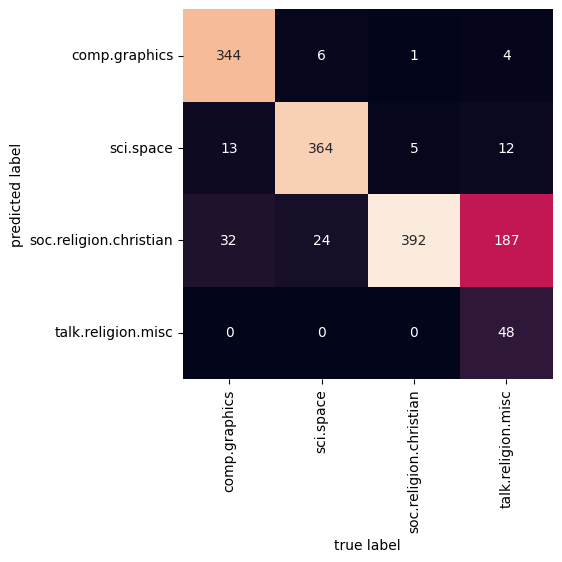

In [14]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [15]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [16]:
predict_category('sending a payload to the ISS')

'sci.space'

In [17]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [18]:
predict_category('determining the screen resolution')

'comp.graphics'